# Краткое введение в Gadfly

Пакет Gadfly для языка Julia реализует концепцию Grammar of Graphics. Пакет довольно схож по функциональности с пакетом ggplot2 из языка программирования R. Те же "слои", те же Geom-ы. Перейдем непосредственно к примерам!\

Для начала подключим пакет Gadfly.
```julia
using Gadfly
```
Попробуем для начала нарисовать что-нибудь простенькое. Скажем, график синуса.
```julia
plot(sin, 0, 3pi)
```
Должно получиться что-то наподобие:


In [5]:
using Gadfly

Попробуем для начала нарисовать что-нибудь простенькое. Скажем, график синуса.

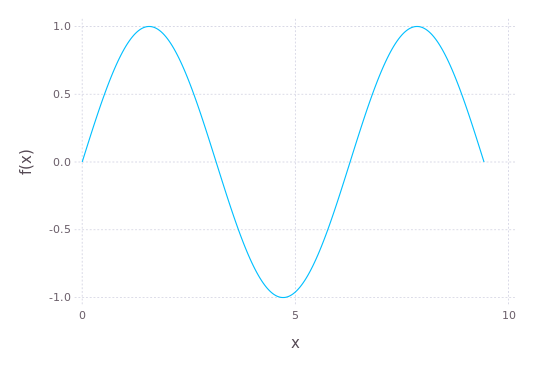

In [6]:
plot(sin, 0, 3pi)

Всё просто: первым аргументом передается функция (без указания аргумента, только имя), вторым и третьим - начало и конец отрезка, на котором рисовать.
Попробуем передать свою функцию в plot.

In [7]:
function my_func(x)
    if x < 0
        return -2x
    else
        return 3x + 1
    end
end

my_func (generic function with 1 method)

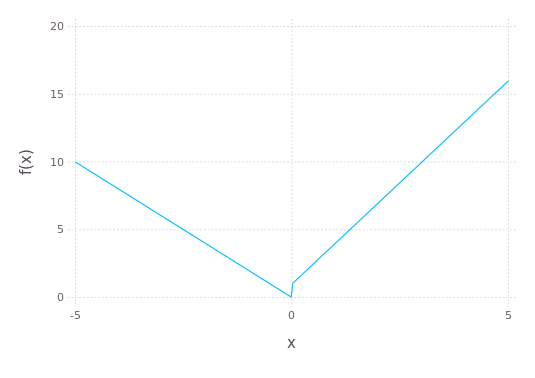

In [8]:
plot(my_func, -5, 5)

Ну а что, если мы хотим нарисовать сразу две функции на одном графике? Всё просто: надо передать в качестве первого аргумента массив из двух (трёх, четырех, etc) функций.

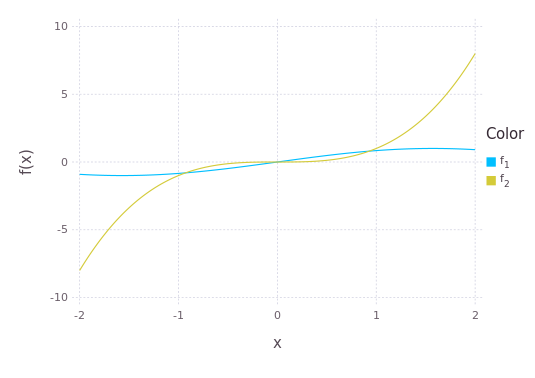

In [9]:
plot([sin, x -> x^3], -2, 2)

Вторым аргументом массива я сделал анонимную функцию x -> x^3, чтобы не плодить лишних сущностей.

Всё это выглядит красиво и симпатично, и для простых графиков сойдет и такой метод, но если мы хотим что-нибудь "понавороченней", то необходимо уже пользоваться более продвинутыми вещами.

Загрузим классический датасет цветков Ириса.

In [10]:
using RDatasets
iris = dataset("datasets", "iris");

Теперь построим что-нибудь интересное, например, графики SepalLength vs SepalWidth

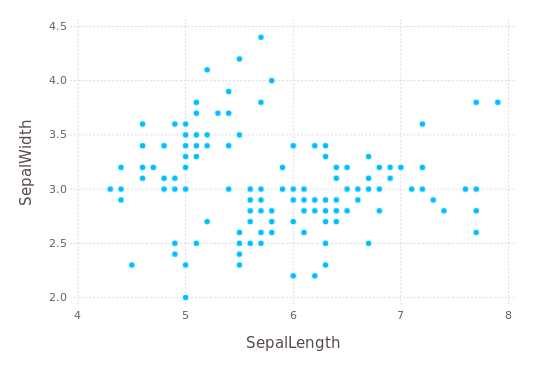

In [11]:
plot(iris, x=:SepalLength, y=:SepalWidth, Geom.point)

Первым аргументом я указываю свой датасет, затем аргументы x, y - названия колонок (типа Symbol!), затем нужный Geom. Существует множество различных Geom-ов, некоторые мы рассмотрим позднее.

Как бы нам теперь раскрасить точки в зависимости от типа цветка?

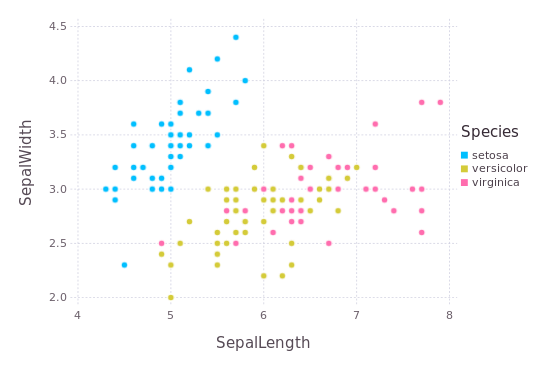

In [12]:
plot(iris, x=:SepalLength, y=:SepalWidth, color = :Species, Geom.point)

Необходимо просто указать аргумент color с подходящим столбцом. 

А что, если мне вдруг захотелось, чтобы точки были квадратными?

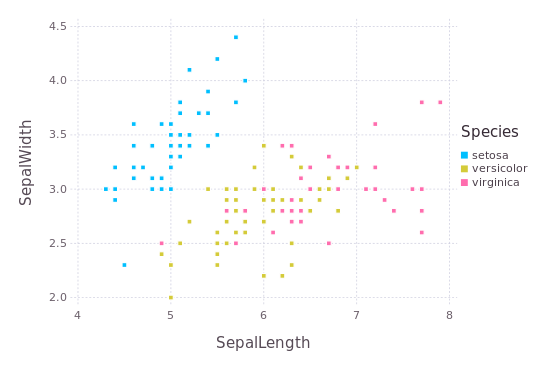

In [13]:
plot(iris, x=:SepalLength, y=:SepalWidth, color = :Species, shape = [Shape.square], Geom.point)

... да пожирнее бы, а то не видно ничего ...

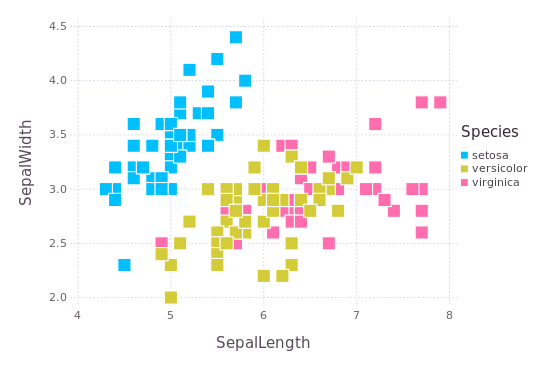

In [14]:
plot(iris, x=:SepalLength, y=:SepalWidth, color = :Species, shape = [Shape.square], size = [7pt], Geom.point)

Заметьте, что и shape, и size - вектора (длины 1)! Более того, без волшебных pt размер у вас не поменяется. 

Ну хорошо, а если я хочу, чтоб у меня было 3 графика один столбец vs другой столбец, и все они друг под другом рядышком?

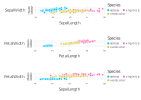

In [15]:
p1 = plot(iris, x=:SepalLength, y=:SepalWidth, color = :Species, Geom.point);
p2 = plot(iris, x=:PetalLength, y=:PetalWidth, color = :Species, Geom.point);
p3 = plot(iris, x=:SepalLength, y=:PetalWidth, color = :Species, Geom.point);
vstack(p1, p2, p3)

Не этого мы хотели! 

Как бы их сделать побольше, чтоб всё разглядеть?

In [16]:
set_default_plot_size(8inch, 8inch)

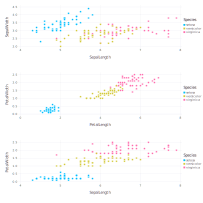

In [17]:
p1 = plot(iris, x=:SepalLength, y=:SepalWidth, color = :Species, Geom.point);
p2 = plot(iris, x=:PetalLength, y=:PetalWidth, color = :Species, Geom.point);
p3 = plot(iris, x=:SepalLength, y=:PetalWidth, color = :Species, Geom.point);
vstack(p1, p2, p3)

Другое дело! Ну а если мы хотим аж четыре графика рядом? Можно тут не только по вертикали, но и по горизонтали склеить? 

Можно! Либо тем же hstack, либо используя gridstack.

Что нам мелочиться, построим сразу все графики, какие только возможно!

In [18]:
myPlots = []

0-element Array{Any,1}

In [19]:
set_default_plot_size(8inch, 8inch)

In [20]:
colNames = names(iris)[1 : 4]  #берем только первые четыре столбца

4-element Array{Symbol,1}:
 :SepalLength
 :SepalWidth 
 :PetalLength
 :PetalWidth 

In [21]:
for i in 1 : 4
    for j in (i + 1) : 4
        push!(myPlots, plot(iris, x=colNames[i], y=colNames[j], color = :Species, Geom.point))
    end
end

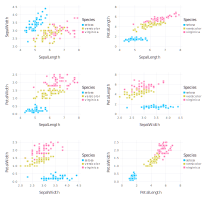

In [22]:
gridstack([myPlots[1] myPlots[2]; myPlots[3] myPlots[4]; myPlots[5] myPlots[6]])

А теперь мы хотим вот чего:
1. Нарисовать график синуса жирно красным цветом.
2. На том же графике изобразить логарифм, синей пунктирной линией.
3. Подписать оси, подписать график!

Ну что же, попробуем...

In [23]:
xs = collect(0.01 : 0.01 : 2pi);
# создаем сетку с начальным элементом 0.01, конечным 2pi, с шагом 0.01

In [24]:
ys1 = sin.(xs);
ys2 = log.(xs);
# применяем векторизованные операции sin. и log.

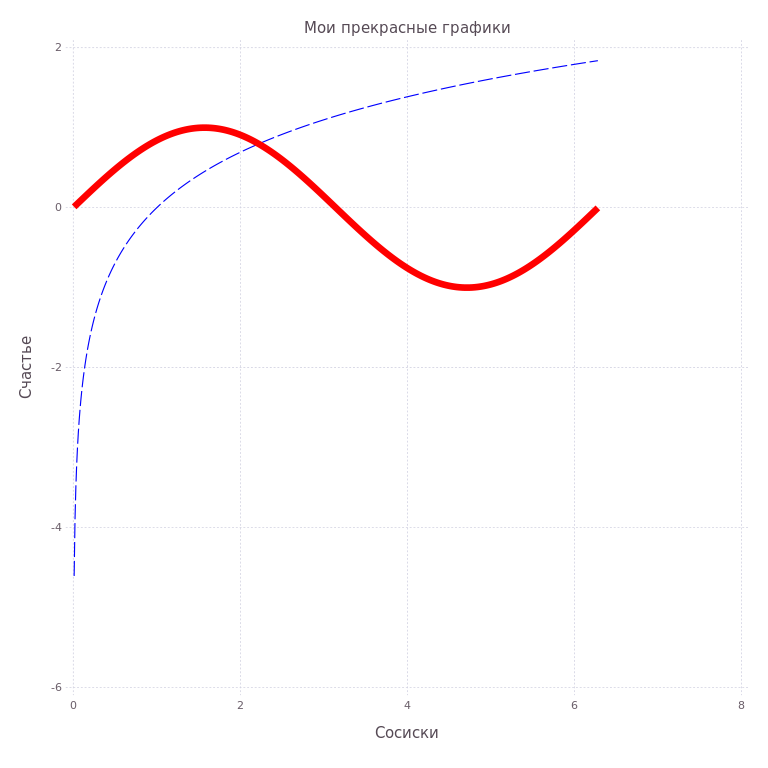

In [25]:
plot(
    layer(x = xs, y = ys1, Geom.line, Theme(default_color = "red", line_width = 5pt)),
    layer(x = xs, y = ys2, Geom.line, Theme(default_color = "blue", line_style = :dash)),
    Guide.title("Мои прекрасные графики"),
    Guide.xlabel("Сосиски"),
    Guide.ylabel("Счастье"))

У "функции" Theme есть бесчисленное множество параметров, которые можно варьировать. 